In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.callbacks import Callback

import numpy as np

import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print ('x_train shape:', x_train.shape)
print ('y_train shape:', y_train.shape)
print ('x_test shape:', x_test.shape)
print ('y_test:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test: (10000,)


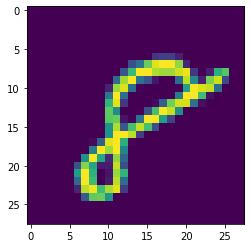

In [16]:
plt.imshow(x_train[59999])
plt.show()

In [17]:
y_train[59999]

8

In [18]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [20]:
#One Hot Encoding: Encoding Lables

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded: (10000, 10)


In [32]:
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000, 784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped:', x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped: (10000, 784)


In [33]:
print(set(x_train_reshaped[59999]))

{0, 2, 4, 6, 7, 10, 11, 14, 18, 19, 21, 22, 23, 25, 26, 27, 28, 38, 40, 41, 44, 46, 48, 52, 59, 60, 62, 63, 66, 67, 71, 73, 76, 77, 86, 89, 90, 92, 94, 97, 101, 105, 110, 116, 121, 122, 126, 130, 131, 134, 142, 146, 147, 153, 154, 162, 164, 165, 167, 172, 175, 176, 177, 180, 181, 187, 190, 192, 193, 196, 197, 198, 199, 203, 209, 212, 213, 216, 217, 218, 219, 222, 225, 229, 230, 231, 232, 233, 236, 237, 238, 239, 240, 242, 243, 244, 248, 249, 252, 253, 254, 255}


In [35]:
x_mean = np.mean(x_test_reshaped)
x_std = np.std(x_test_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

print(set(x_train_norm[59999]))

{-0.1489308783620349, 1.7456672419297017, 2.074064249446936, 2.642443685534457, 2.7813808810225176, 2.2508934073408313, 2.4150919110994487, 2.3266773321525007, 2.5666597607227875, 1.6446220088474757, 2.137217520123327, 2.6298130313991788, 2.47824518177584, 1.8593431291472058, 1.3667476178713542, 2.7182276103461263, 1.1141345351657894, 2.591921068993344, 2.4656145276405614, 1.97301901636471, 0.15420482088464296, -0.19945349490314787, 1.8467124750119277, 2.705596956210848, 2.3393079862877793, 2.2130014449349966, 0.7352149111074422, 1.1015038810305111, 1.2278104223832937, -0.11103891595620015, 2.0866949035822144, 2.579290414858066, 0.8488907983249463, -0.42680526933815627, -0.33839069039120856, 0.3689259411843731, -0.24997611144426085, -0.16156153249731314, -0.37628265279704326, 1.2151797682480154, 0.3310339787785384, 0.4194485577254861, -0.28786807385009555, -0.07314695355036542, 0.46997117426659907, 0.40681790359020786, 2.3140466780172226, 2.5540291065875094, 2.061433595311658, 1.935127

In [42]:
model = Sequential ([
    Dense(128, activation = 'relu', input_shape=(784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

2022-04-20 14:04:19.380021: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-20 14:04:19.381008: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [44]:
model.compile(optimizer = 'sgd', #stochastic gradient descent
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train_norm, y_train_encoded, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3536 - accuracy: 0.8960
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1754 - accuracy: 0.9483
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1320 - accuracy: 0.9621
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1080 - accuracy: 0.9683
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0919 - accuracy: 0.9727
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0795 - accuracy: 0.9765
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0695 - accuracy: 0.9800
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0617 - accuracy: 0.9824
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0547 - accuracy: 0.9844
Epoch 10/10
6

In [52]:
model.evaluate(x_test_norm, y_test_encoded, callback)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08150363769857213, 0.9737]

In [51]:
accuracy*100

97.36999869346619

In [54]:
preds = model.predict(x_test_norm)
print ('Shape of preds:', preds.shape)

Shape of preds: (10000, 10)


<function matplotlib.pyplot.show(close=None, block=None)>

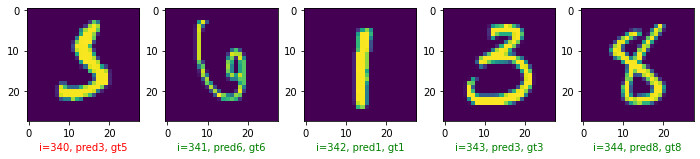

In [60]:
plt.figure(figsize = (12,12))

start_index = 340

for i in range(5):
    plt.subplot(5, 5,i+1)
    plt.grid(False)
    plt.xticks()
    plt.yticks()

    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index + i]

    col = 'g'
    if pred != gt:
        col = 'r'

    plt.xlabel('i={}, pred{}, gt{}'.format(start_index+i, pred, gt), color = col)
    plt.imshow(x_test[start_index+i])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

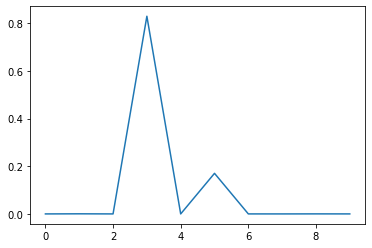

In [61]:
plt.plot(preds[340])
plt.show